# Training the normalized Dataset  🏃🏻

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('./output/diamond_train_norm.csv', index_col=0)
train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.023256,0.50,0.000000,0.000000,0.550000,0.250000,0.419355,0.073175,0.084906,0.015088
1,0.032558,0.75,0.166667,0.142857,0.544444,0.230769,0.435973,0.076231,0.088050,0.012925
2,0.046512,0.50,0.333333,0.142857,0.480556,0.365385,0.459433,0.080645,0.089623,0.021307
3,0.046512,1.00,0.500000,0.285714,0.522222,0.311538,0.461388,0.080475,0.091824,0.025254
4,0.162791,0.50,0.333333,0.142857,0.500000,0.384615,0.596285,0.104075,0.117296,0.219284


In [5]:
train.shape

(40455, 10)

In [6]:
test = pd.read_csv('./output/diamond_test_norm.csv', index_col=0)
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.449064,0.75,1.0,0.428571,0.567568,0.107143,0.808194,0.813093,0.750716
1,0.382536,0.75,0.5,0.428571,0.608108,0.178571,0.761639,0.780835,0.729226
2,0.064449,0.75,1.0,0.142857,0.597973,0.107143,0.482309,0.492410,0.458453
3,0.020790,0.75,1.0,0.142857,0.584459,0.178571,0.402235,0.410816,0.379656
4,0.158004,0.00,0.5,0.000000,0.837838,0.178571,0.568901,0.567362,0.595989


In [7]:
test.shape

(13485, 9)

-------

--------

## Checking out the RMSE of each model

In [9]:
X = train.drop(columns=["price"])
y = train["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
models = {
    "forest200": RandomForestRegressor(n_estimators=200),
    "forest400": RandomForestRegressor(n_estimators=400),
    "boosting_950": GradientBoostingRegressor(n_estimators=950),
    "boosting_1050": GradientBoostingRegressor(n_estimators=1050),
    "extra_100":ExtraTreesRegressor(),
    "extra_300":ExtraTreesRegressor(n_estimators=300),
    "extra_700":ExtraTreesRegressor(n_estimators=700),
    "hist": HistGradientBoostingRegressor() 
}

In [11]:
for name, model  in models.items():
    print(f"Starting training")
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"Training complete")

Starting training
Training forest200...
Training complete
Starting training
Training forest400...
Training complete
Starting training
Training boosting_950...
Training complete
Starting training
Training boosting_1050...
Training complete
Starting training
Training extra_100...
Training complete
Starting training
Training extra_300...
Training complete
Starting training
Training extra_700...
Training complete
Starting training
Training hist...
Training complete


In [12]:
printMetric = lambda label,value:print(f"\t {label}: {round(value,4)}")

for name,m in models.items():
    y_pred = m.predict(X_test)
    print(f"Evaluating model {name}")
    printMetric("RMSE",math.sqrt(mean_squared_error(y_test, y_pred)))

Evaluating model forest200
	 RMSE: 0.0321
Evaluating model forest400
	 RMSE: 0.032
Evaluating model boosting_950
	 RMSE: 0.0339
Evaluating model boosting_1050
	 RMSE: 0.0336
Evaluating model extra_100
	 RMSE: 0.0315
Evaluating model extra_300
	 RMSE: 0.0313
Evaluating model extra_700
	 RMSE: 0.0314
Evaluating model hist
	 RMSE: 0.0316


------

-----

### Pred N5 w/ Extra300 normalized 

In [8]:
X = train.drop(columns=["price"])
y = train["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
model = ExtraTreesRegressor(n_estimators=300)
fitted_model = model.fit(X, y)

In [15]:
y_pred_final = fitted_model.predict(test)
y_pred_final

array([0.79246467, 0.63241564, 0.1114107 , ..., 0.22838723, 0.10056547,
       0.1978369 ])

In [16]:
pred = pd.DataFrame(y_pred_final).reset_index()
pred = pred.rename(columns={"index": "id", 0: "price"})
pred.head()

,id,price
0,0,0.792465
1,1,0.632416
2,2,0.111411
3,3,0.091991
4,4,0.266028


In [17]:
pred.shape

(13485, 2)

In [18]:
# pred.to_csv('./output/pred5.csv', header=True, index=False)

In [10]:
x_predict = fitted_model.predict(X_test)

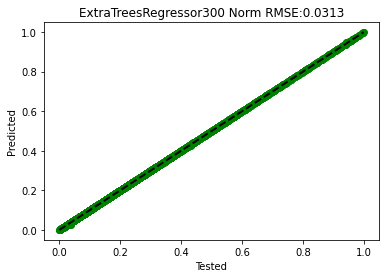

In [13]:
plt.scatter(x_predict, y_test, c="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,)
plt.xlabel('Tested')
plt.ylabel('Predicted')
plt.title("ExtraTreesRegressor300 Norm RMSE:0.0313" )
plt.show()